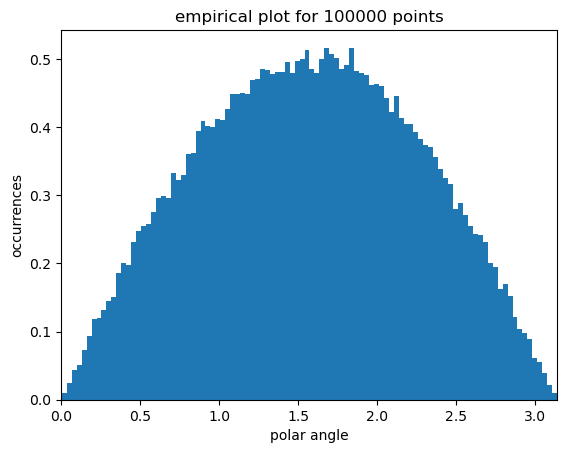

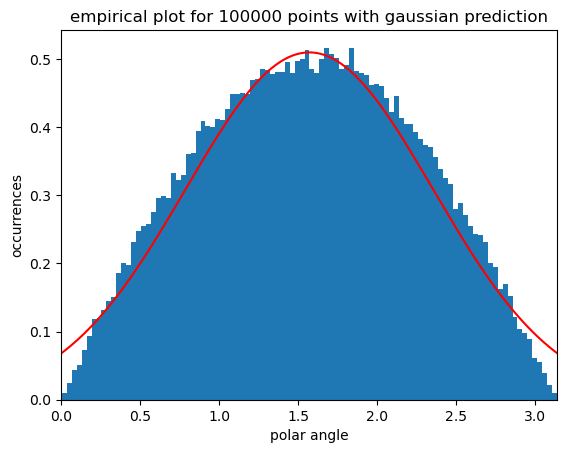

In [257]:
import math
import numpy as np
import matplotlib.pyplot as plt
import numpy as np 
from numpy import random 

## A4 Q1: Probability on a Sphere
## Abigail deGroot 
## 21012489

N = 100000 #number of points to be generated


def points():      # generates N normalized, 3D points and returns them in a list
    d = [ ]
    for i in range(N): 
        r = np.random.normal
        x, y, z = r(), r(), r()
        norm = math.sqrt(x**2 + y**2 + z**2)
        p = [x/norm, y/norm, z/norm]
        d.append(p)
    return d 

p = points()

def theta(): 
    t = []
    for i in range(N): 
        a = np.arccos(p[i][2])
        t.append(a)
    return t

t = theta() 

# histogram 
plt.hist(t, bins = 100, density = True)
plt.xlim(xmin = 0, xmax = math.pi)
plt.ylim(ymin = 0)
plt.title("empirical plot for " + str(N) + " points")   
plt.xlabel("polar angle")
plt.ylabel("occurrences")
plt.show()

# constants for the gaussian formula
data = t
stddev = np.std(data) + 0.1 # std deviation slightly larger than python thinks to fit data better
mean = np.mean(data)


## formula for probability distribution used 
## is the probability density funtion for a gaussian dist. 
## This was chosen based on the appearance of the histogram 
def probDist(x) : 
    func = (1/(math.sqrt(2*math.pi)*stddev))*math.e**(-0.5*((x-mean)/stddev)**2)
    return func

def pix(): # normalizes array of N points so that it runs from 0 to pi
    new = []
    for i in range(N): 
        new.append(i*math.pi/N)
    return new 
    
x = pix()

def gauss():    # does what map does cause old habits die hard
    y = []
    for i in range(N):
        y.append(probDist(x[i]))
    return y

y = gauss()


# superimposed function over hist 
plt.hist(t, bins = 100, density = True)
plt.plot(x, y, 'r')
plt.xlim(xmin = 0, xmax = math.pi)
plt.ylim(ymin = 0)
plt.title("empirical plot for " + str(N) + " points with gaussian prediction")   
plt.xlabel("polar angle")
plt.ylabel("occurrences")
plt.show()

In [256]:
import math
import numpy as np
import matplotlib.pyplot as plt

## A4 Q2: Mr. Rogers
## Abigail deGroot 
## 21012489

## 1D 

#a 
def parta(n, x, deltax): #n is the density of points, x is the variable and deltax is the point to the right of x
    p0 = math.e**(-n*x)# probability to not find a point from 0 and x, k = 0
    px = deltax*n*math.e**(-deltax*n)# probability to find a point from x to delta x, k = 1
    
    prob = p0*px 
    
    func =  n*math.e**(-n*x) # from prob; lim prob/deltax for deltax-> 0 
    
    return func  # integral is n/-n e^-nx eval from 0 to inf -> 0 - (-1) = 1 so it is normalized

#b    
def partb(r, t1, t2): #r is the density of clicks, t1 is the time at first click and t2 is the time at the second click
    p0 = math.e**(-r*t1)# probability to not hear a click befor t1, k = 0 
    px = deltax*r*math.e**(-t2*r)# probability to hear a click between t1 and t2, k = 1
    
    prob = p0*px   # total prob. dist
    
    func =  r*math.e**(-r*t1) # from prob ; lim prob/deltax for deltax-> 0 
    
    return func  

#c 
# written response 

## 2D

#d 
def partd(n, r, deltar): # n is the density of points, r is some position r from the origin
    pr = math.e**(-math.pi*(r**2)*n)      #probability that the nearest point won't be between 0 and r k = 0
    pdeltar = 2*math.pi*n*deltar*r*math.e**(-math.pi*r*delatr*n)    #probability for r to delta, k = 1
    
    prob = pr*pdeltar   # total probbability
    
    func = 2*math.pi*n*r*math.e**(-math.pi*(r**2)*n) # from prob ; lim prob/deltar for deltar-> 0 
    
    return func # integral is 2pi n r /(-2pi n r) e^-pi n r^2 eval from 0 to inf -> 0 - (-1) = 1 so it is normalized

#e 
# written response


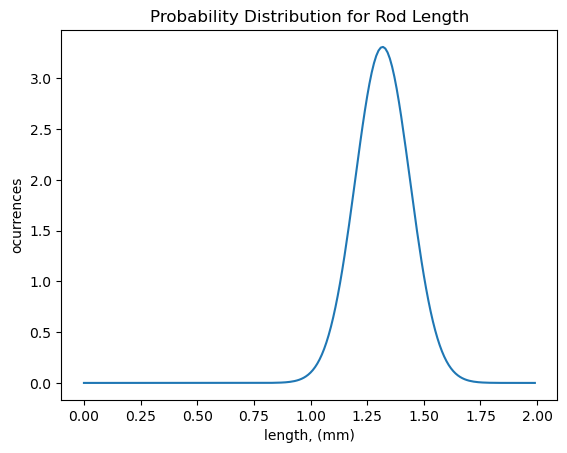

the most probable length is: 1.371 with a confidence interval on x = [1.268, 1.368]

 this is interesting because the most probable length accoring to the gaussian does 
 not fit within the confidence interval taken from the data

 this may be due to the size of the dataset and the value that looks to be an outlier, 1.077, because it is much smaller than the rest


In [225]:
import math
import numpy as np
import matplotlib.pyplot as plt

## A4 Q3: Hold My Rod 
## Abigail deGroot 
## 21012489

data = [1.245 , 1.318 , 1.351 , 1.422 , 1.430, 1.077] # given data 


# constants for the gaussian formula
stddev = np.std(data)
data.sort()
mean = data[round(len(data)/2 -1)]

#known gaussian formula 
def gaussian(x): 
    g = (1/(math.sqrt(2*math.pi)*stddev))*math.e**(-(1/2)*((x-mean)/stddev)**2)
    return g 


#ability to find the length from the gaussian
def reversegaussian(g): 
    x = stddev*math.sqrt(math.log(g*(math.sqrt(2*math.pi)*stddev))*(-2))+mean 
    return x

c= 0 
x = []
for i in range(200):  # making x array 
    x.append(c)
    c+= 0.01
    
y = [] 
for i in range(len(x)):   # making y array 
    y.append(gaussian(x[i]))

    
plt.plot(x, y)
plt.title("Probability Distribution for Rod Length")
plt.xlabel("length, (mm)")
plt.ylabel("ocurrences") 
plt.show()


# known formula for confidence interval using t vals
# CI =  mean +/- t* stddev/sqrt(deg. freedom)
# from table, t for 80% confidence: 0.920

CI = [round((mean - 0.920*stddev/math.sqrt(5)), 3), round((mean + 0.920*stddev/math.sqrt(5)), 3)]

print("the most probable length is: " + str(round(reversegaussian(l), 3)) + " with a confidence interval on x = " + str(CI))

print("\n this is interesting because the most probable length accoring to the gaussian does \n not fit within the confidence interval taken from the data")

print("\n this may be due to the size of the dataset and the value that looks to be an outlier, 1.077, because it is much smaller than the rest") 